In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

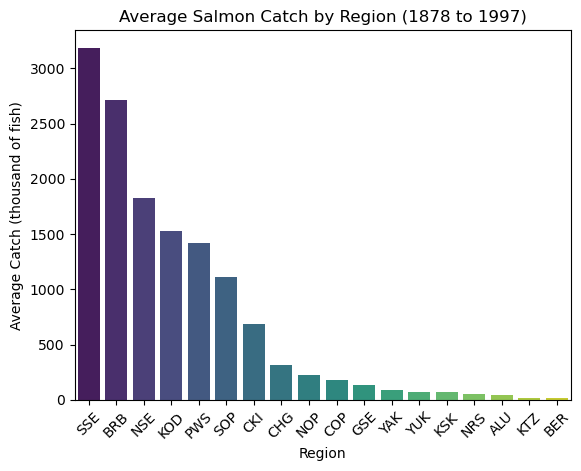

In [20]:
# FINAL CODE

# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas to display all rows, columns, and what is contained
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Read in data
catch_data = pd.read_csv('data/salmon_data.csv')

# Use `.drop()` to exclude the column name 'notesRegCode' from the dataframe
catch_data = catch_data.drop(columns = ['notesRegCode'])

# Subset to find row with 'I' in 'Catch' Column
catch_I = catch_data[catch_data['Catch'] == 'I']

# Replace the value 'I' to '1' in the 'Catch' column using `.loc`
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Verify the replacement by retrieving the same row using `.index`
# Use 'catch_I' variable previously assigned to row with 'I' 
catch_1 = catch_data.loc[catch_I.index]

# Use `.astype()` to convert 'Catch' column into 'int64'
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Use `.groupby()` on 'Region' and store only 'Catch' column
# Calculate the average using `.mean()`
avg_region = catch_data.groupby('Region', as_index = False)['Catch'].mean()

# Sort the value descending orders and using 'Catch' column
avg_region_cleaned = avg_region.sort_values('Catch', ascending = False)

# Plot bar graph!
sns.barplot(
    data = avg_region_cleaned,
    x = 'Region',
    y = 'Catch',
    hue = 'Region',
    palette = 'viridis',
    legend = False)

# Add details and information of the bar graph
plt.title('Average Salmon Catch by Region (1878 to 1997)')
plt.ylabel('Average Catch (thousand of fish)')
plt.xlabel('Region')
plt.xticks(rotation = 45)
plt.show()

## 1

a. Use this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

In [2]:
# a.
# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas to display all rows, columns, and what is contained
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Read in data
catch_data = pd.read_csv('data/salmon_data.csv')

# Use `.head` to check first 5 data
catch_data.head(5)

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b.
# Using `print()` to show all data explorations
# Use `.info()` to check summary of 'catch_data' dataframe
print(catch_data.info())

# Use `.describe()` to check summary statistics
print('\n', catch_data.describe())

# Use `.unique()` to check how many different names of values we have in 'Species' column
print('\nNames of salmon species: ', catch_data['Species'].unique())

# Use `.value_counts()` to check the counts in each unique value of 'Species' column
print(catch_data['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB
None

               Year
count  8540.000000
mean   1946.323185
std      30.341709
min    1878.000000
25%    1922.000000
50%    1947.000000
75%    1972.000000
max    1997.000000

Names of salmon species:  ['Chinook' 'Sockeye' 'Coho' 'Pink' 'Chum']
Species
Chinook    1708
Sockeye    1708
Coho       1708
Pink       1708
Chum       1708
Name: count, dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I explored the dataset to understand the structure, information, and distribution of the data frame and salmon species. I have used `.info()` to find out overall structure of the dataframe `catch_data` along with `.describe()` to know basic summary statistics. I also checked the `'Species'` column in `catch_data` and used `.unique()` to see the names of salmon species. After seeing all the names, I have used `.value_counts()` to see the number of counts of each salmon species.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [4]:
# 2a.
# Use `.unique()` to check how many different names of values we have in 'notesRegCode' column
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [5]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# 2b.
# Use `.drop()` to exclude the column name 'notesRegCode' from the dataframe
catch_data = catch_data.drop(columns = ['notesRegCode'])

In [7]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Columns such as `'Region'` and `'Species'` columns are `object` type which is expected as those columns contains text. `'Year'` column is `int64` data type as expected since the column only contains numerical values. `'Catch'` column stands out for being `object` type as it should only contains numeric values as this column represents "Commercial catches of salmon species (in thousands of fish)" from the description._

In [8]:
# Use `.dtypes` to check the data types of our dataframe
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


In [9]:
# Use `.unique()` to inspect 'Catch' column
print(list(catch_data['Catch'].unique()))

['0', '3', '4', '5', '9', '12', '17', '43', '34', '66', '80', '152', '191', '133', '119', '39', '115', '122', '121', '81', '54', '79', '140', '49', '106', '63', '69', '145', '76', '220', '297', '315', '341', '200', '36', '399', '609', '485', '57', '93', '378', '146', '257', '298', '319', '266', '187', '211', '263', '204', '169', '151', '107', '138', '150', '124', '100', '73', '84', '118', '102', '113', '108', '110', '95', '112', '125', '142', '144', '104', '61', '96', '127', '88', '68', '74', '70', '78', '120', '98', '56', '32', '24', '38', '7', '11', '15', '13', '6', '33', '46', '27', '37', '62', '65', '71', '94', '135', '176', '173', '246', '149', '223', '478', '479', '251', '197', '295', '239', '379', '307', '163', '312', '597', '278', '265', '493', '370', '515', '180', '252', '261', '170', '205', '222', '192', '262', '293', '226', '218', '126', '184', '207', '185', '130', '174', '238', '193', '213', '198', '264', '217', '167', '194', '183', '212', '159', '209', '134', '182', '256',

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [11]:
# Subset to find row with 'I' in 'Catch' Column
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [12]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [13]:
# Replace the value 'I' to '1' in the 'Catch' column using `.loc`
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Verify the replacement by retrieving the same row using `.index`
# Use 'catch_I' variable previously assigned to row with 'I' 
catch_1 = catch_data.loc[catch_I.index]

# Print 'catch_1'
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [14]:
# Use `.astype()` to convert 'Catch' column into 'int64'
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Confirm and store the data type in the variable
catch_column_type = catch_data['Catch'].dtypes
catch_column_type

dtype('int64')

In [15]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [16]:
# Use `.groupby()` on 'Region' and store only 'Catch' column
# Calculate the average using `.mean()`
avg_region = catch_data.groupby('Region', as_index = False)['Catch'].mean()
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


In [17]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

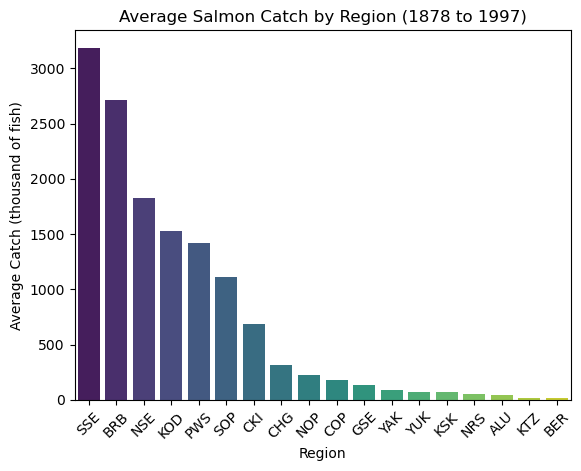

In [18]:
# Sort the value descending orders and using 'Catch' column
avg_region_cleaned = avg_region.sort_values('Catch', ascending = False)

# Plot bar graph!
sns.barplot(
    data = avg_region_cleaned,
    x = 'Region',
    y = 'Catch',
    hue = 'Region',
    palette = 'viridis',
    legend = False)

# Add details and information of the bar graph
plt.title('Average Salmon Catch by Region (1878 to 1997)')
plt.ylabel('Average Catch (thousand of fish)')
plt.xlabel('Region')
plt.xticks(rotation = 45)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

_The plot shows that Southern Southeast Alaska and Bristol Bay Management Area shows the highest average salmon catches between 1879 to 1997. In the other hand, Bering River Subarea Copper River Subarea and Kotzebue Management Area	shows the lowest average of salmon catches. Overall the pattern suggests that coastal regions historically more productive salmon fisheries._

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [19]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!